Orientation (theta) =  120.0 degrees
Tral-averaged, time-averaged rate =  16.199004975124378 Hz


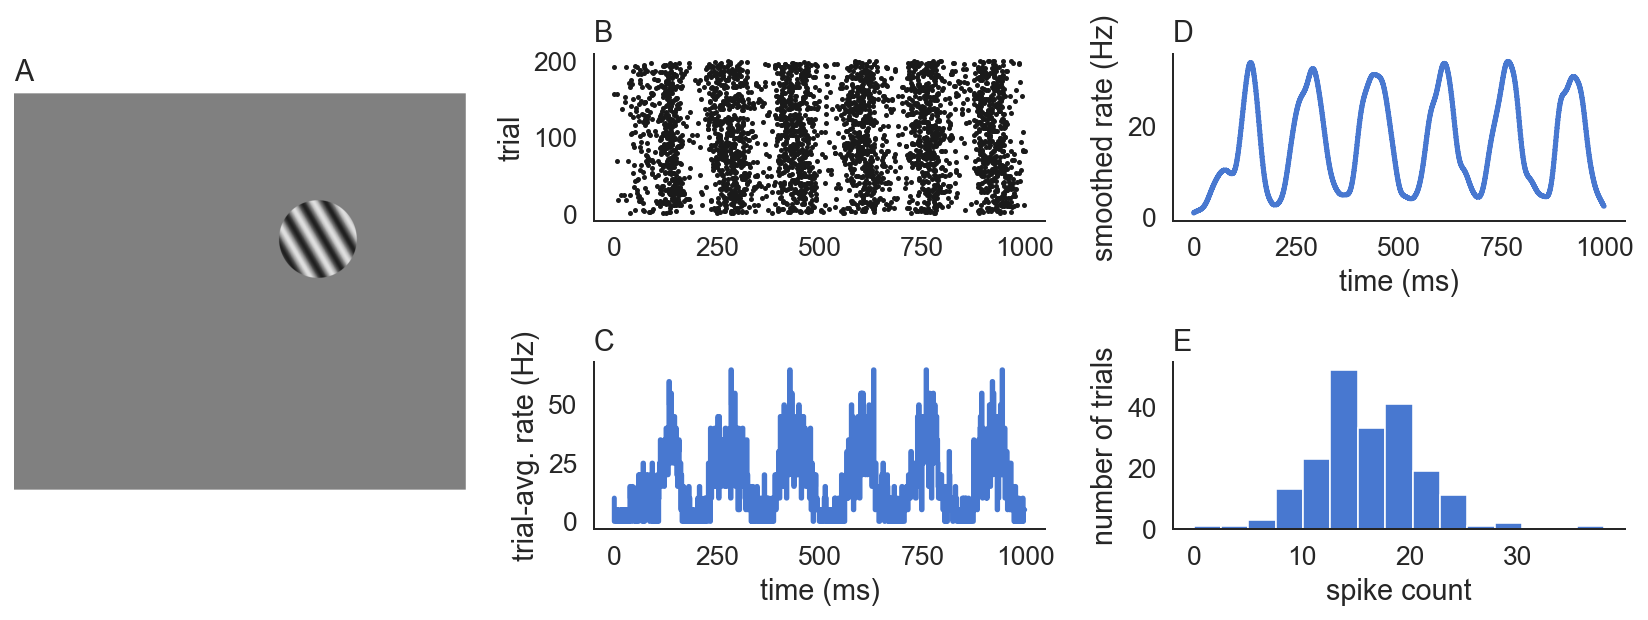

In [1]:
###############################################
## Import packages and specify some settings ##
###############################################
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This makes plots show up and look nice
%matplotlib inline
sns.set(context='paper',style='white',font_scale=1.5,rc={"lines.linewidth":2.5})
sns.set_palette('muted')
%config InlineBackend.figure_format = 'retina'

# Keep this set to false unless you want to save figures and data
# (in which case you'll need to change some directories below)
SaveFigures=True
###############################################
###############################################


# Load the data from a file
try: 
    data = np.load('./DataFiles/SpikeTimes1Neuron1Theta.npz', allow_pickle=True)
except:
    url = "https://raw.githubusercontent.com/RobertRosenbaum/ModelingNeuralCircuits/master/CodeFromBook/DataFiles/SpikeTimes1Neuron1Theta.npz"
    file = np.DataSource().open(url)
    data = np.load(file.name, allow_pickle=True)


# Extract the data from the data dictionary to arrays.
SpikeTimes=data['SpikeTimes']
TrialNumbers=data['TrialNumbers']
T=data['T']
theta=data['theta']

# Compute the number of trials
NumTrials=np.max(TrialNumbers)+1

# Print the orientation of the stimulus
print('Orientation (theta) = ',theta, 'degrees')

# Make a multi-trial spike density representation
dt=1
time=np.arange(0,T,dt)
S=np.zeros((NumTrials,len(time)))
S[TrialNumbers,(SpikeTimes/dt).astype(int)]=1/dt


# Compute and print the time-averaged, trial-averaged rate 
TrialAvgTimeAvgRate=np.mean(S)
print('Tral-averaged, time-averaged rate = ',1000*TrialAvgTimeAvgRate,'Hz')

# Trial averaged rates across time
TrialAvgRates=np.mean(S,axis=0)

# Compute spike counts for each trial by taking the
# Riemmann integral of the spike density on each trial
SpikeCounts=np.sum(S,axis=1)*dt


# Compute a smoothed trial-averaged rate
# by convolving the mean of S with a kernel
sigma=10
s=np.arange(-3*sigma,3*sigma,dt)
k=np.exp(-(s**2)/(2*sigma**2))
k=k/(sum(k)*dt)
SmoothedRate=np.convolve(k,TrialAvgRates,'same')*dt


# Make figure
plt.subplots(figsize=(13*.9, 5*.9))

plt.subplot(1,3,1)
# Get image for plot
# Get image for plot
try: 
    im = plt.imread('./ImageFiles/DriftingGrating.png')
except:
    try:
        url = "https://raw.githubusercontent.com/RobertRosenbaum/ModelingNeuralCircuits/master/CodeFromBook/ImageFiles/DriftingGrating.png"
        file = np.DataSource().open(url)
        im = plt.imread(file.name)
    except:
        im = 1.0+np.zeros([100,100,3],dtype=np.uint8)
plt.imshow(im,interpolation='hanning')
plt.axis('off')
plt.title('A',loc='left')


plt.subplot(2,3,2)
plt.plot(SpikeTimes,TrialNumbers,'k.',markersize=3)
#plt.xlabel('time (ms)')
plt.ylabel('trial')
plt.title('B',loc='left')
sns.despine()

plt.subplot(2,3,5)
plt.step(time,1000*TrialAvgRates)
plt.xlabel('time (ms)')
plt.ylabel('trial-avg. rate (Hz)')
plt.title('C',loc='left')
sns.despine()

plt.subplot(2,3,3)
plt.step(time,1000*SmoothedRate)
plt.xlabel('time (ms)')
plt.ylabel('smoothed rate (Hz)')
plt.title('D',loc='left')
sns.despine()


plt.subplot(2,3,6)
plt.hist(SpikeCounts,bins=15)
plt.xlabel('spike count')
plt.ylabel('number of trials')
plt.title('E',loc='left')
sns.despine()


plt.tight_layout()

